# Inverse Modeling of DFN using trans-dimensional MCMC -- 
## Inversion Result

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from nbhelper import vtkmesh_show, nbplotstyle, parse_jobreport, load_chain
import seaborn as sns
%matplotlib inline
nbplotstyle(style='seaborn-darkgrid')

### Synthetic DFN model

In [2]:
project_dir = '/Users/shiyili/euler_remote/scratch/Case3_1x1x1_cxyz_dr_2'

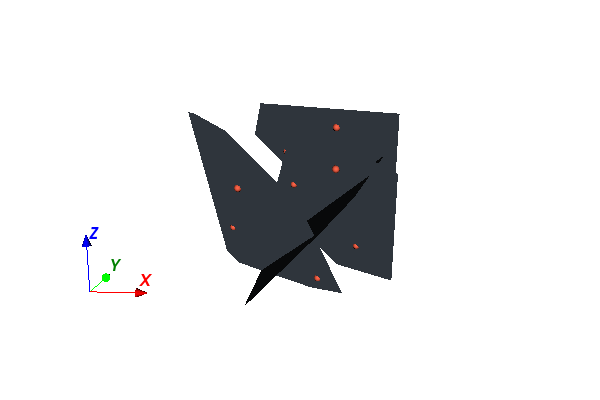

In [3]:
mesh_file = project_dir + '/synthetic/forward_simulation/full_mesh.vtk'
obs_file = project_dir + '/synthetic/forward_simulation/obs_points.vtk'
vtkmesh_show(mesh_file, obs_file)

### Synthetic Observation Data

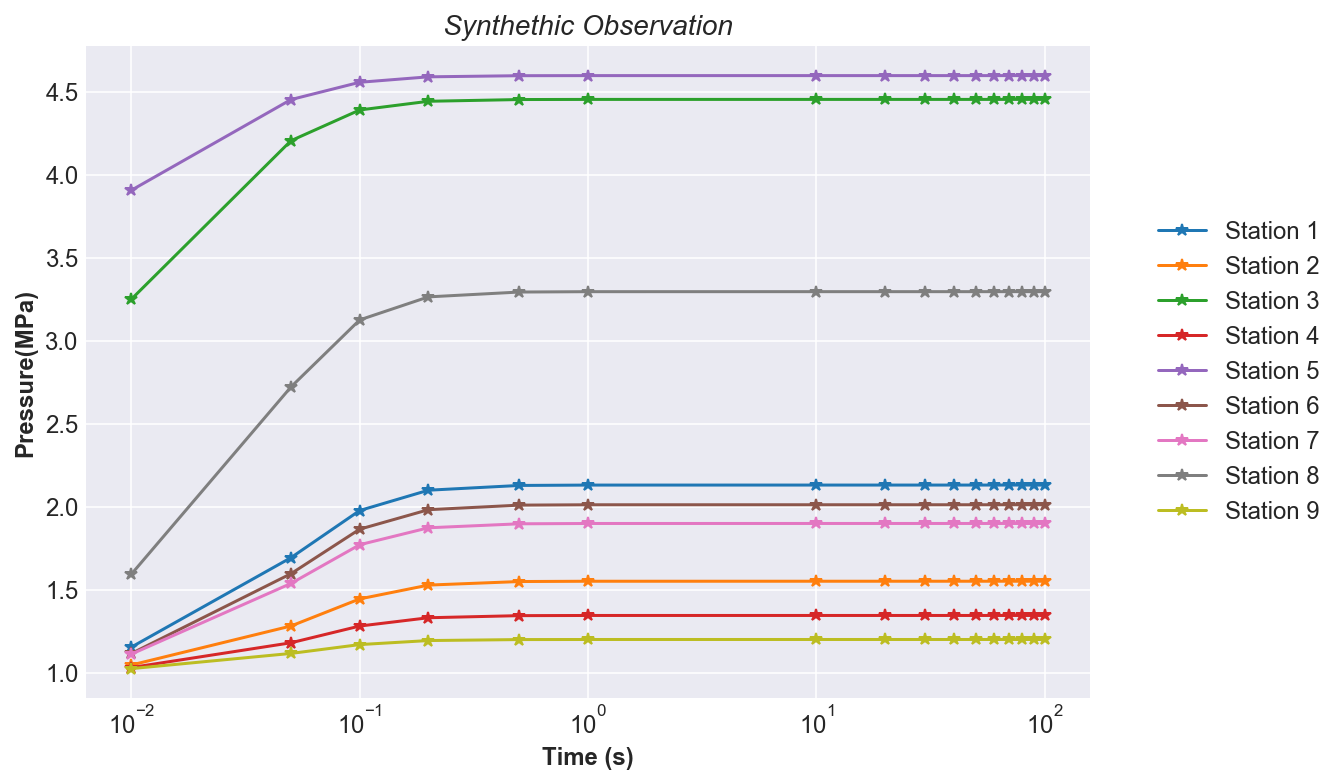

In [4]:
syn_observation = project_dir + '/synthetic/forward_simulation/forward_results.csv'
syn_jobreport = project_dir + '/synthetic/job_report.txt'
syn_data = pd.read_csv(syn_observation, index_col=0)
time = parse_jobreport(syn_jobreport)

fig = plt.figure(figsize=[9, 6])
cols = syn_data.columns
for col in cols:
    plt.plot(time, syn_data[col], '*-',label='Station ' + col.split('_')[-1])
plt.xscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Pressure(MPa)')
plt.title('Synthethic Observation', fontstyle='italic')
plt.legend(loc=7, bbox_to_anchor=(1.25, 0.5))
plt.show()

## Root-Mean-Square Error Log of MCMC 

In [5]:
pkl_file = project_dir + '/inverse/mcmc_chain.pkl'
rms_log, shape_log, id_log = load_chain(pkl_file)

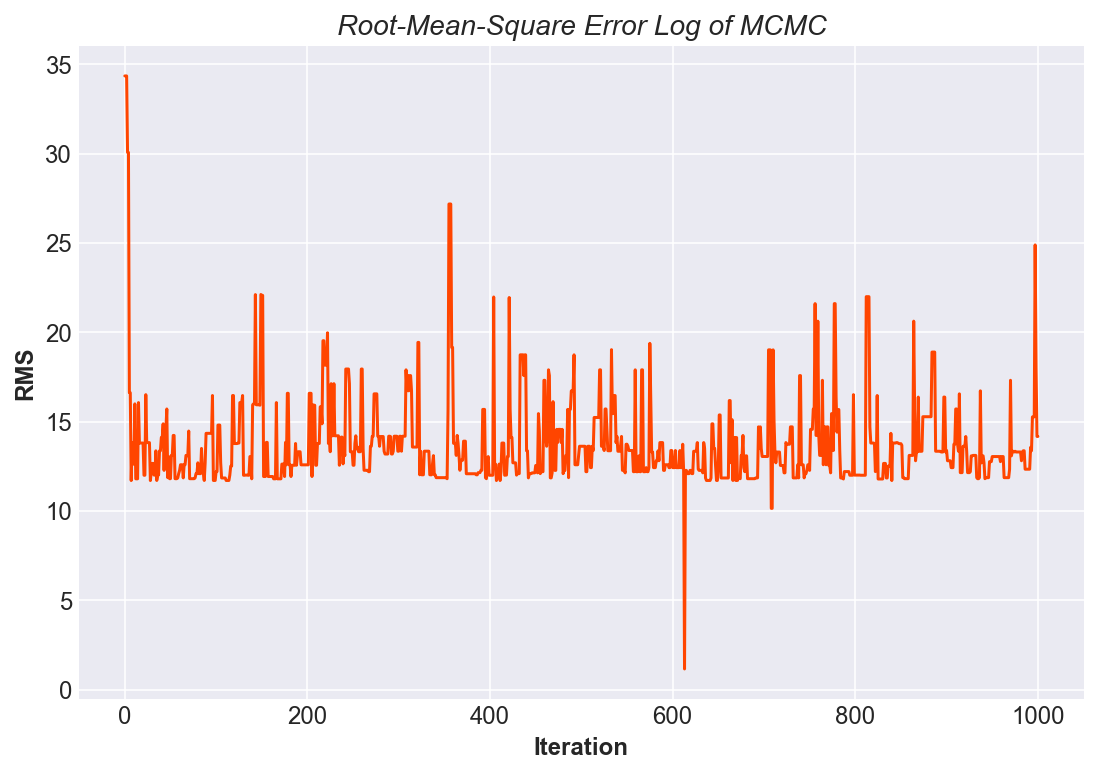

In [6]:
fig = plt.figure()
plt.plot(rms_log, color='orangered')
plt.xlabel('Iteration')
plt.ylabel('RMS')
plt.title('Root-Mean-Square Error Log of MCMC', fontstyle='italic')
# plt.savefig(project_path + '/rms_iteration.pdf')
plt.show()

### Probabalistic distribution of variables

In [29]:
cx = np.asarray([e[3,0] for e in shape_log])
cy = np.asarray([e[3,1] for e in shape_log])
cz = np.asarray([e[3,2] for e in shape_log])

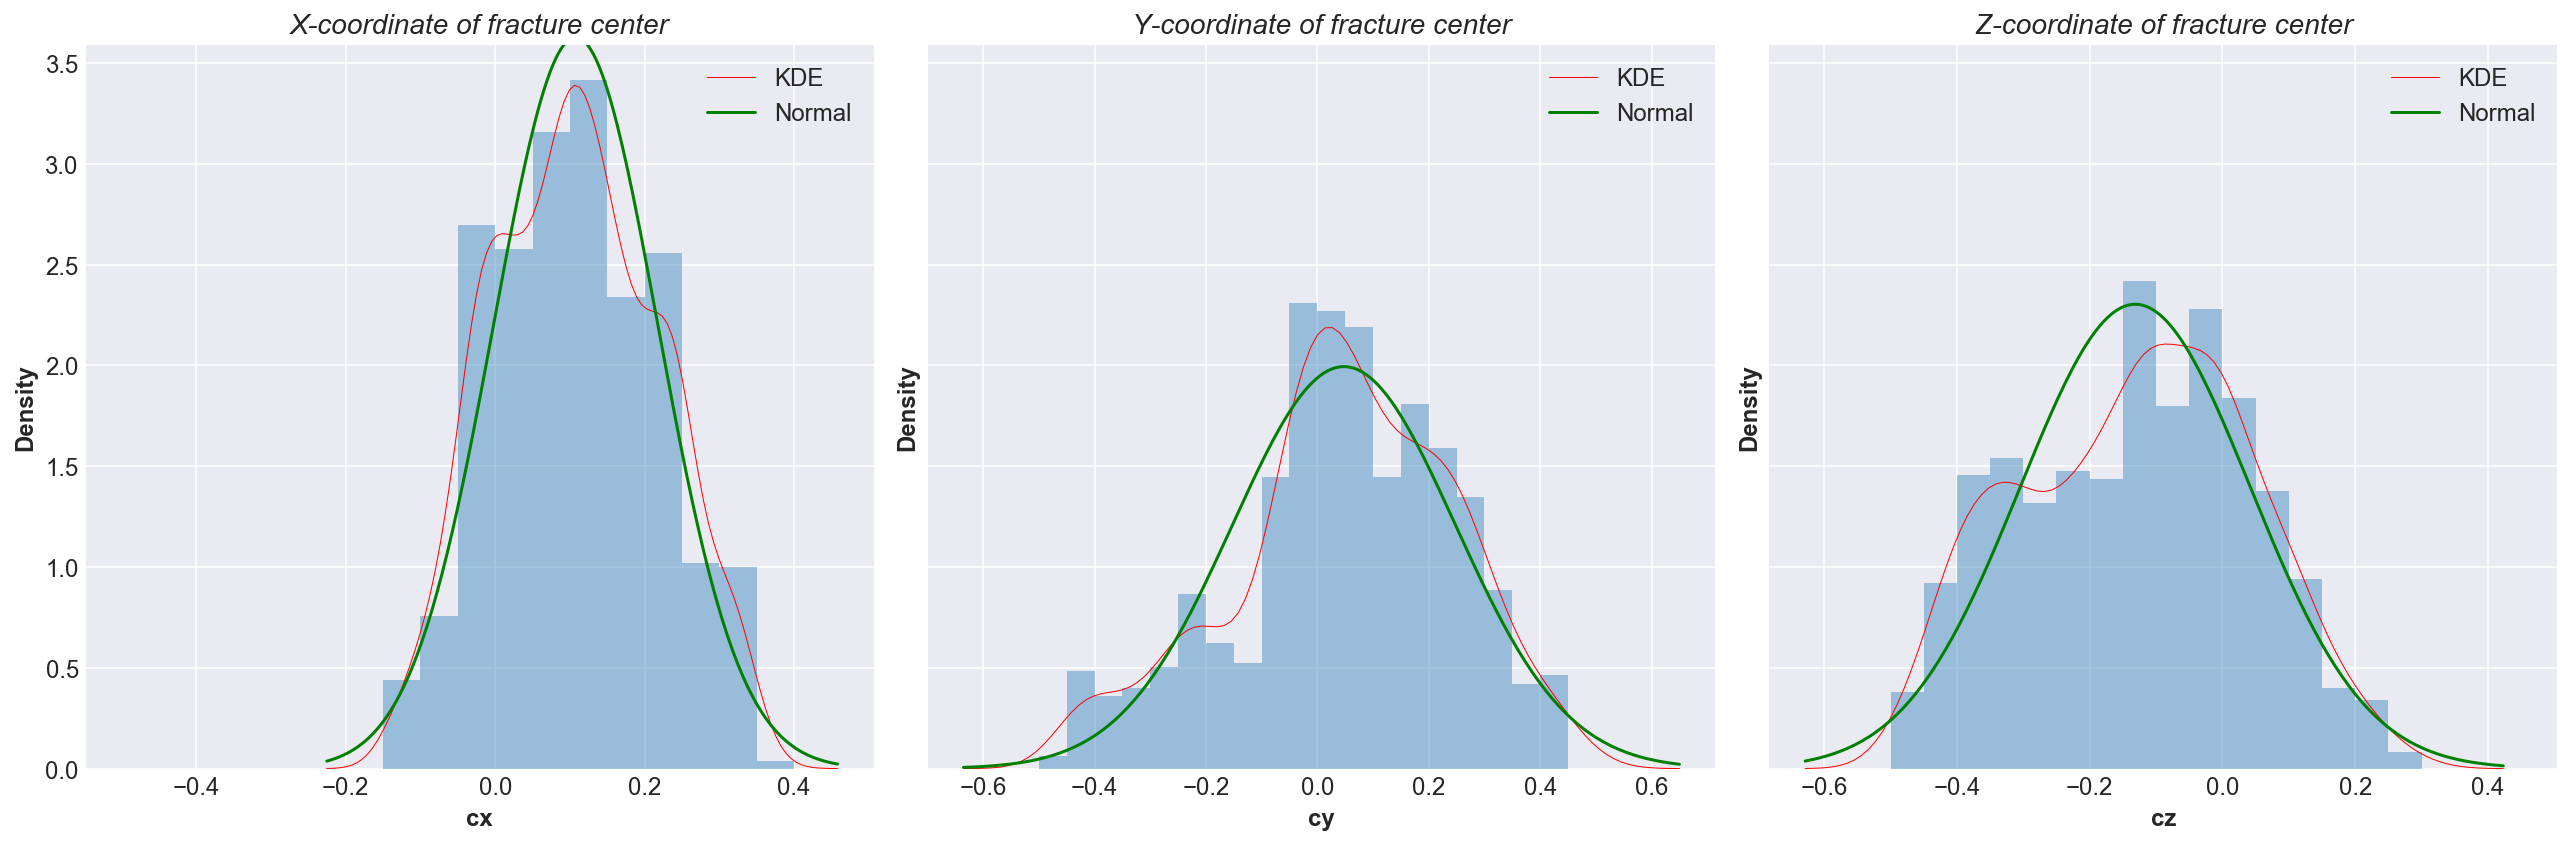

In [30]:
f, axes = plt.subplots(1, 3, figsize=[18,6], sharey=True)
bins = np.arange(-0.5, 0.5, 0.05)

sns.distplot(cx, bins=bins, ax=axes[0], fit=norm, 
             kde_kws={"color": "r", "lw": 0.5, "label": "KDE"},
             fit_kws={"color": "g", "lw": 1.5, "label": "Normal"})

axes[0].set_xlabel('cx')
axes[0].set_ylabel('Density')
axes[0].set_title('X-coordinate of fracture center', fontstyle='italic')
axes[0].legend()

sns.distplot(cy, bins=bins, ax=axes[1], fit=norm, 
             kde_kws={"color": "r", "lw": 0.5, "label": "KDE"},
             fit_kws={"color": "g", "lw": 1.5, "label": "Normal"})

axes[1].set_xlabel('cy')
axes[1].set_ylabel('Density')
axes[1].set_title('Y-coordinate of fracture center', fontstyle='italic')
axes[1].legend()

sns.distplot(cz, bins=bins, ax=axes[2], fit=norm, 
             kde_kws={"color": "r", "lw": 0.5, "label": "KDE"},
             fit_kws={"color": "g", "lw": 1.5, "label": "Normal"})

axes[2].set_xlabel('cz')
axes[2].set_ylabel('Density')
axes[2].set_title('Z-coordinate of fracture center', fontstyle='italic')
axes[2].legend()

plt.tight_layout()
plt.show()